In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##READING FILE
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Target Encoding

In [3]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

### One Hot Encoding

In [4]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,1,2064,2,87,4,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,1,2065,4,63,2,...,0,0,0,0,0,1,0,1,0,0


### Separate X and y

In [5]:
y = df['Attrition']
X = df.drop('Attrition', axis=1)

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Check Missing Values

In [7]:
X_train.isnull().sum().sum()

0

In [8]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Model Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

### Train Model

In [10]:
log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

### Prediction

In [11]:
y_pred = log_model.predict(X_test)

### Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

[[190  57]
 [ 18  29]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       247
           1       0.34      0.62      0.44        47

    accuracy                           0.74       294
   macro avg       0.63      0.69      0.64       294
weighted avg       0.82      0.74      0.77       294



### Feature Importance

What factors are causing employees to quit?

In [14]:
import pandas as pd

importance = pd.Series(log_model.named_steps["model"].coef_[0], index=X_train.columns)
importance = importance.sort_values()
importance.tail(15)

JobRole_Research Scientist           0.307579
DistanceFromHome                     0.321529
Department_Research & Development    0.388911
JobRole_Sales Executive              0.389970
JobRole_Human Resources              0.390939
MaritalStatus_Single                 0.444851
NumCompaniesWorked                   0.467562
YearsSinceLastPromotion              0.496872
Department_Sales                     0.497184
BusinessTravel_Travel_Rarely         0.512612
JobRole_Sales Representative         0.536274
JobLevel                             0.664712
BusinessTravel_Travel_Frequently     0.721874
OverTime_Yes                         0.773438
JobRole_Laboratory Technician        0.811973
dtype: float64

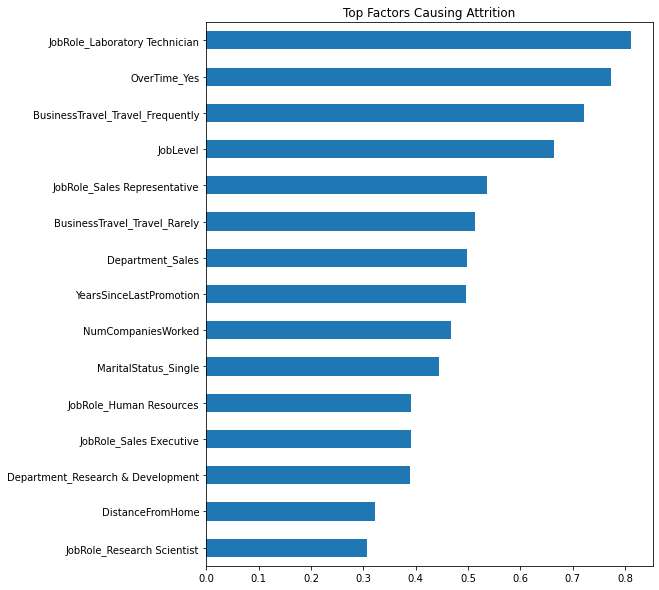

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
importance.tail(15).plot(kind='barh')
plt.title("Top Factors Causing Attrition")
plt.show()